#https://towardsdatascience.com/financial-data-from-yahoo-finance-with-python-b5399743bcc6 
import sys
!{sys.executable} -m pip install yfinance


In [1]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn

In [2]:
# SP500 complete
start=datetime.datetime(1992, 1, 1)
end=datetime.datetime(2013, 1, 1)
SP500 = yf.Ticker("^GSPC")
SP500 = SP500.history(start = start, end = end)


In [3]:
print(SP500.index)

DatetimeIndex(['1991-12-31', '1992-01-02', '1992-01-03', '1992-01-06',
               '1992-01-07', '1992-01-08', '1992-01-09', '1992-01-10',
               '1992-01-13', '1992-01-14',
               ...
               '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20',
               '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27',
               '2012-12-28', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=5292, freq=None)


In [4]:
# Get Sector Data from Wikipedia
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
#show unique economy sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)

In [5]:
print(sectors)

{'Real Estate', 'Energy', 'Consumer Staples', 'Industrials', 'Information Technology', 'Utilities', 'Financials', 'Communication Services', 'Consumer Discretionary', 'Health Care', 'Materials'}


In [6]:
def SectorNormReturns(sec,df, start, end, lag):
    # takes the name of a sector and returns the aggregated data of all companies' normalised returns from 
    # start to endhich have full data for this time period
    # Normalising via averages over lag
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end)
        StockData = StockData["Close"]
     
        
        # only add stocks to sector data which have full history
        if len(StockData.index) == len(SP500.index):
            
            
            
            # calculate returns via difference operator and an index shift
            
            
            
            StockShifted = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            StockShifted.index = StockData.index[1:(len(StockData))]
            StockData = (StockData.diff()/StockShifted) 
        
            # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
            Shift = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            Shift.index = StockData.index[1:] 
            
            
            #print(sym)
            PlusOutput = (StockData-Shift.rolling(lag).mean())/Shift.rolling(lag).std()
            #print(PlusOutput)
            
            Output = Output.add(PlusOutput)
        
        
    return(Output)

In [7]:
# Normalizes returns

NormRetDF = pd.DataFrame(data = ())


for s in sectors:
    print(s)
    SectorDF = df[df["GICS Sector"] == s]
    SectorSymbols = SectorDF['Symbol'].values.tolist()
    
    #Seclist.append(SectorPrices(s, start, end))
    NormRetDF[s] = SectorNormReturns(s, df,start, end, 13)
    
    

Real Estate
Energy
Consumer Staples
- BF.B: No data found for this date range, symbol may be delisted
- KHC: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- LW: Data doesn't exist for startDate = 694220400, endDate = 1356994800
Industrials
- ALLE: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- CARR: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- FTV: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- HWM: No data found for this date range, symbol may be delisted
- INFO: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- IR: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- OTIS: Data doesn't exist for startDate = 694220400, endDate = 1356994800
Information Technology
- ANET: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- CDW: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- CDAY: Data doesn't exist for startDate = 694220400, e

In [8]:
print(NormRetDF)

            Real Estate     Energy  Consumer Staples  Industrials  \
Date                                                                
1991-12-31          NaN        NaN               NaN          NaN   
1992-01-02          NaN        NaN               NaN          NaN   
1992-01-03          NaN        NaN               NaN          NaN   
1992-01-06          NaN        NaN               NaN          NaN   
1992-01-07          NaN        NaN               NaN          NaN   
...                 ...        ...               ...          ...   
2012-12-24    -0.294416 -15.162604         -4.858815   -23.260561   
2012-12-26   -10.870374  -9.763804        -24.124111   -32.778544   
2012-12-27     1.640472  -2.798087          1.879907   -12.282677   
2012-12-28   -10.273460 -23.718327        -24.312331   -54.965543   
2012-12-31    10.874575  27.603944         38.265820    84.733204   

            Information Technology  Utilities  Financials  \
Date                                     

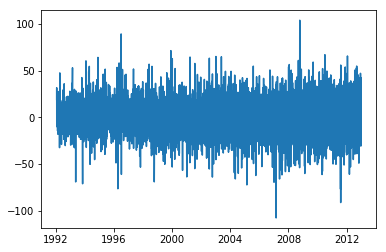

In [9]:
plt.plot(NormRetDF["Utilities"])

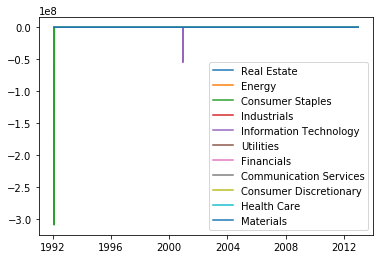

In [10]:
for i in NormRetDF.columns:
    plt.plot(NormRetDF[i], label=i)
    
plt.legend()
plt.show()

Something stragne happened in the IT data:

In [11]:
NormRetDF.idxmin()

Real Estate              2011-08-08
Energy                   2011-08-04
Consumer Staples         1992-05-18
Industrials              1997-10-27
Information Technology   2000-12-06
Utilities                2007-02-27
Financials               2011-08-08
Communication Services   2007-02-27
Consumer Discretionary   1997-10-27
Health Care              1997-10-27
Materials                2001-09-17
dtype: datetime64[ns]

In [12]:
NormRetDF.loc["2000-11-29"]

Real Estate                5.932079
Energy                   -44.806857
Consumer Staples          11.548723
Industrials               24.635552
Information Technology    -2.396257
Utilities                 15.106803
Financials                51.731078
Communication Services     0.564735
Consumer Discretionary     0.284862
Health Care               21.808226
Materials                  5.579857
Name: 2000-11-29 00:00:00, dtype: float64

In [13]:
IT = set(df[df["GICS Sector"] =="Information Technology"]["Symbol"])
print(IT)

{'IBM', 'TRMB', 'GPN', 'WDC', 'ENPH', 'BR', 'STX', 'AMAT', 'NLOK', 'AKAM', 'CRM', 'HPQ', 'FLT', 'AVGO', 'CDW', 'V', 'NVDA', 'GLW', 'ADBE', 'WU', 'ADP', 'ZBRA', 'ACN', 'ADI', 'CTXS', 'KEYS', 'MSI', 'MCHP', 'FISV', 'HPE', 'DXC', 'CSCO', 'NTAP', 'CDAY', 'MPWR', 'SWKS', 'MA', 'PAYX', 'LRCX', 'SNPS', 'TER', 'JKHY', 'INTC', 'VRSN', 'ANSS', 'FIS', 'AMD', 'TYL', 'NOW', 'ORCL', 'MSFT', 'MU', 'QRVO', 'JNPR', 'XLNX', 'CDNS', 'TEL', 'NXPI', 'QCOM', 'KLAC', 'FFIV', 'AAPL', 'APH', 'ANET', 'TXN', 'IPGP', 'FTNT', 'PAYC', 'CTSH', 'PYPL', 'INTU', 'PTC', 'IT', 'ADSK'}


## Some Data Analysis

In [14]:
Corr = NormRetDF.corr()

for i in Corr.columns:
    print(np.mean(Corr[i]),i)

Corr

0.4939976757862524 Real Estate
0.44833826530004023 Energy
0.09368852470079907 Consumer Staples
0.6132999356405106 Industrials
0.09766850560629409 Information Technology
0.46718439777592474 Utilities
0.5820658346193844 Financials
0.5404788283240737 Communication Services
0.5645982213535359 Consumer Discretionary
0.5639784605051914 Health Care
0.5756357434047099 Materials


,Real Estate,Energy,Consumer Staples,Industrials,Information Technology,Utilities,Financials,Communication Services,Consumer Discretionary,Health Care,Materials
Real Estate,1.000000,0.398093,0.010347,0.633367,0.011796,0.469309,0.635208,0.519294,0.599762,0.565597,0.591201
Energy,0.398093,1.000000,0.001334,0.568041,-0.003252,0.478284,0.479323,0.461653,0.452223,0.511092,0.584930
Consumer Staples,0.010347,0.001334,1.000000,0.006797,-0.000189,-0.001205,0.001087,0.010845,-0.000826,-0.008977,0.011362
Industrials,0.633367,0.568041,0.006797,1.000000,0.022379,0.553315,0.805570,0.727468,0.813032,0.774464,0.841867
Information Technology,0.011796,-0.003252,-0.000189,0.022379,1.000000,0.006024,0.003789,0.003440,0.008060,0.010638,0.011669
Utilities,0.469309,0.478284,-0.001205,0.553315,0.006024,1.000000,0.564874,0.521618,0.486179,0.536702,0.523929
Financials,0.635208,0.479323,0.001087,0.805570,0.003789,0.564874,1.000000,0.706979,0.751639,0.737997,0.716260
Communication Services,0.519294,0.461653,0.010845,0.727468,0.003440,0.521618,0.706979,1.000000,0.672117,0.682835,0.639018
Consumer Discretionary,0.599762,0.452223,-0.000826,0.813032,0.008060,0.486179,0.751639,0.672117,1.000000,0.705025,0.723369
Health Care,0.565597,0.511092,-0.008977,0.774464,0.010638,0.536702,0.737997,0.682835,0.705025,1.000000,0.688389


In [15]:
pca = PCA()
pca.fit(Corr)

PCA()

In [16]:
print(pca.explained_variance_ratio_)

[7.54361828e-01 1.00931521e-01 5.11441630e-02 3.19619860e-02
 2.56394733e-02 1.29023764e-02 9.16817219e-03 6.66650611e-03
 5.48306756e-03 1.74090667e-03 1.84577448e-33]


In [17]:
pca.components_

array([[-2.75310990e-01, -2.31700539e-01,  2.27212793e-01,
        -3.65631288e-01,  2.21203857e-01, -2.44867898e-01,
        -3.52430927e-01, -3.19353888e-01, -3.45323891e-01,
        -3.39732889e-01, -3.39785083e-01],
       [-3.02563477e-03, -1.67432588e-02, -7.00899750e-01,
         8.00954107e-03,  7.12718687e-01,  7.85679921e-05,
        -1.47262007e-03, -1.25406162e-02,  5.07694552e-03,
         1.42075822e-02, -5.55855585e-03],
       [-2.01163436e-01,  7.15531629e-01, -1.85646379e-01,
        -1.33110864e-01, -1.64005160e-01,  4.61878445e-01,
        -1.97649855e-01, -1.38726422e-01, -2.94392042e-01,
        -1.00220882e-01, -1.06726109e-02],
       [ 4.05723592e-01, -4.59502207e-01, -8.88719699e-02,
        -1.89724506e-01, -9.42574949e-02,  6.86308648e-01,
         6.43269602e-02, -1.74484980e-02, -1.20563335e-01,
        -8.06280275e-02, -2.73805831e-01],
       [ 7.66796573e-01,  2.30860578e-01, -7.57957824e-02,
        -2.30753449e-02, -6.83836118e-02, -3.14482135e-01,
  

## Interval-wise

In [18]:
Period = 40 # 2 trading months

T = int(len(NormRetDF)/Period)


for t in range(T):
    IntervalDF = NormRetDF.iloc[(0+t*Period):(Period+t*Period)]
    IntervalCorr = IntervalDF.corr()
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0.5516675291670508 0
0.5071898538281266 1
0.6327093006724621 2
0.6307688590205456 3
0.4465130424377163 4
0.5687517268041616 5
0.4728944765513349 6
0.5896571628586261 7
0.40285293251952764 8
0.4629100548760263 9
0.40906370891343324 10
0.3066632733107134 11
0.4856931906992774 12
0.36406444623030054 13
0.47624599224505776 14
0.41851895719372695 15
0.34389925088033635 16
0.3853900501566107 17
0.5893847393437056 18
0.3601677180953054 19
0.4004481191404275 20
0.3718345175491306 21
0.41419474516369903 22
0.4699430890213125 23
0.2884889411712841 24
0.4786640792383701 25
0.6754435254123269 26
0.4822294063830122 27
0.5045084107751749 28
0.44417642521505657 29
0.32724841957947076 30
0.41016773061571865 31
0.46547122933826884 32
0.4681549653876419 33
0.5704974808114993 34
0.5344748299178572 35
0.5948115942582324 36
0.5365109273367968 37
0.49957086941445483 38
0.531917260079665 39
0.5613842088257323 40
0.3711342291831457 41
0.883174094333074 42
0.40520251812191926 43
0.47722588994932613 44
0.514427

In [19]:
# now overlapping intervals
Period = 40 # 2 trading months
Shift = 10
T = int((len(NormRetDF) - Period)/Shift)

CorrMatrices = np.empty((T, 121))


for t in range(T):
    #print((0+t*Shift),(Period+t*Shift))
    IntervalDF = NormRetDF.iloc[(0+t*Shift):(Period+t*Shift)]
    IntervalCorr = IntervalDF.corr()
    CorrMatrices[t,:] = IntervalCorr.to_numpy().reshape(1,-1)
    
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0.5516675291670508 0
0.5356239885886762 1
0.5314804355531725 2
0.45020451076295265 3
0.5071898538281266 4
0.5892387047435471 5
0.568237158867599 6
0.6983933351272575 7
0.6327093006724621 8
0.5821663986592728 9
0.5773690829255637 10
0.6886028869318818 11
0.6307688590205456 12
0.4615132925887724 13
0.5737650595530208 14
0.4844890064202384 15
0.4465130424377163 16
0.5069053428412019 17
0.5528510855647008 18
0.5625041875107434 19
0.5687517268041616 20
0.41005364444245485 21
0.34864530416929124 22
0.3765164653797276 23
0.4728944765513349 24
0.38371463389514093 25
0.5089858973533653 26
0.5533826447414175 27
0.5896571628586261 28
0.48546215178846114 29
0.3772558924404212 30
0.39162038601555255 31
0.40285293251952764 32
0.49128046324138486 33
0.5368329352912043 34
0.5580418953390025 35
0.4629100548760263 36
0.35659972112213684 37
0.3641632904057255 38
0.348838232879998 39
0.40906370891343324 40
0.39445857547133506 41
0.2886222466862297 42
0.3553939902404313 43
0.3066632733107134 44
0.281451443

0.48855117454427816 376
0.4509226505772182 377
0.5560792376368692 378
0.5177834689775886 379
0.5841411072333349 380
0.6335689923039046 381
0.526636014002293 382
0.4022576394693323 383
0.3819375304524205 384
0.4309644928833138 385
0.43731358879294036 386
0.4902228898417723 387
0.5427266956535288 388
0.4722010060076725 389
0.4322087984381507 390
0.4027214647832752 391
0.3353782766165643 392
0.38584419241968204 393
0.3985256498790459 394
0.4429528568268168 395
0.42921984913636446 396
0.5506776835224877 397
0.5473374352233442 398
0.5131690350326079 399
0.5453752668975402 400
0.4922051624961934 401
0.528427423886487 402
0.5181041235510261 403
0.5064170224721684 404
0.47212374202346225 405
0.5660890434972038 406
0.5297646229533608 407
0.7122952816367998 408
0.7809243909227962 409
0.7940103941261518 410
0.8741795075752281 411
0.861351692494508 412
0.8301770405876917 413
0.8705923098096041 414
0.843435147687717 415
0.8953386008253739 416
0.8530641346182666 417
0.8306715768987764 418
0.71449976


for t in range(T):
    print((0+t*Shift),(Period+t*Shift), SectorsDF.index[int(0.5*Period)+t*Shift])

In [20]:
print(CorrMatrices)
print(CorrMatrices.shape)

[[1.         0.07463355 0.1961433  ... 0.53793693 0.34486781 1.        ]
 [1.         0.01856578 0.19099998 ... 0.45005703 0.32836232 1.        ]
 [1.         0.14867452 0.20608053 ... 0.45774582 0.363425   1.        ]
 ...
 [1.         0.31474836 0.34327167 ... 0.74683721 0.77069664 1.        ]
 [1.         0.30644166 0.56120337 ... 0.7542491  0.81603506 1.        ]
 [1.         0.40098633 0.61724653 ... 0.7197809  0.82762329 1.        ]]
(525, 121)


In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(CorrMatrices)

In [22]:
ClusterPred = kmeans.fit_predict(CorrMatrices)
print(len(ClusterPred))

525


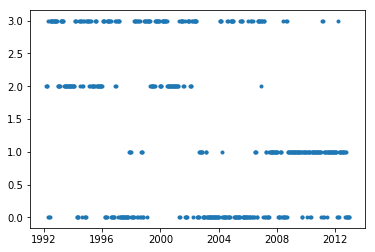

In [23]:
plt.scatter(NormRetDF.index[np.arange(Period+1, len(NormRetDF.index)-Shift, Shift)],
            ClusterPred, marker=".")
plt.show()

# That does not look like the original publication...
# BECAUSE THE GICS CLASSIFICATION HAS CHANGED!!

##### Reduce number of matrix elements

Diagonal is always 1 and rest is symmetric
-> only need one triangle of the correlation matrices

In [24]:
IntCorrMat = IntervalCorr.to_numpy()
print(IntCorrMat.shape)

(11, 11)


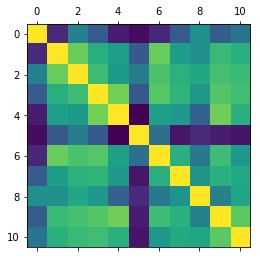

In [25]:
plt.matshow(IntCorrMat)
plt.show()

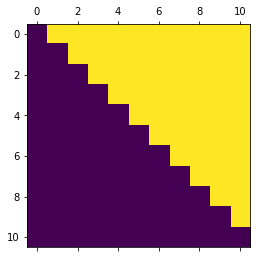

In [26]:
plt.matshow(np.triu(IntCorrMat,1)>0)
plt.show()

In [27]:
print(len((np.triu(IntCorrMat,1)).reshape(1,-1)[(np.triu(IntCorrMat,1)!=0).reshape(1,-1)]))

55


In [28]:
def ReduceData(CorrMat):
    # takes a nxn correlatin matrix and returns only upper triangle without diagonal elements as 1d array
    return((np.triu(CorrMat,1)).reshape(1,-1)[(np.triu(CorrMat,1)!=0).reshape(1,-1)])

print(ReduceData(IntCorrMat), len(ReduceData(IntCorrMat)))

[0.40098633 0.61724653 0.5153586  0.36880986 0.33901766 0.39116649
 0.51159547 0.66008032 0.51713126 0.58213501 0.84099298 0.74392223
 0.70322703 0.50615477 0.84188059 0.70007633 0.66223614 0.77847377
 0.74981665 0.78417789 0.68952718 0.60648595 0.80301904 0.75439853
 0.72558022 0.79942711 0.78030686 0.85311734 0.50440426 0.81888883
 0.76304058 0.68511747 0.81592202 0.79152343 0.3162277  0.70505062
 0.68471263 0.5311436  0.8526734  0.74907701 0.56991584 0.35807838
 0.40168141 0.36744309 0.35376261 0.74923071 0.59311446 0.78812796
 0.68211054 0.67048998 0.7498956  0.73395822 0.61402619 0.7197809
 0.82762329] 55


In [29]:
# now overlapping intervals
Period = 40 # 2 trading months
Shift = 10
T = int((len(NormRetDF) - Period)/Shift)

CorrMatrices = np.empty((T, 55))


for t in range(T):
    #print((0+t*Shift),(Period+t*Shift))
    IntervalDF = NormRetDF.iloc[(0+t*Shift):(Period+t*Shift)]
    IntervalCorr = IntervalDF.corr()
    CorrMatrices[t,:] = ReduceData(IntervalCorr.to_numpy())
    
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0.5516675291670508 0
0.5356239885886762 1
0.5314804355531725 2
0.45020451076295265 3
0.5071898538281266 4
0.5892387047435471 5
0.568237158867599 6
0.6983933351272575 7
0.6327093006724621 8
0.5821663986592728 9
0.5773690829255637 10
0.6886028869318818 11
0.6307688590205456 12
0.4615132925887724 13
0.5737650595530208 14
0.4844890064202384 15
0.4465130424377163 16
0.5069053428412019 17
0.5528510855647008 18
0.5625041875107434 19
0.5687517268041616 20
0.41005364444245485 21
0.34864530416929124 22
0.3765164653797276 23
0.4728944765513349 24
0.38371463389514093 25
0.5089858973533653 26
0.5533826447414175 27
0.5896571628586261 28
0.48546215178846114 29
0.3772558924404212 30
0.39162038601555255 31
0.40285293251952764 32
0.49128046324138486 33
0.5368329352912043 34
0.5580418953390025 35
0.4629100548760263 36
0.35659972112213684 37
0.3641632904057255 38
0.348838232879998 39
0.40906370891343324 40
0.39445857547133506 41
0.2886222466862297 42
0.3553939902404313 43
0.3066632733107134 44
0.281451443

0.42499075446101675 460
0.5546721825576377 461
0.6927128611897899 462
0.5892927913947141 463
0.6039273996211348 464
0.7051329288378423 465
0.6315372176514281 466
0.6927685244816028 467
0.6939890189715587 468
0.5388483572035911 469
0.4560260002496281 470
0.33826161097039054 471
0.3236342245157376 472
0.35013143562700216 473
0.34107642950086736 474
0.4873453100473995 475
0.37016601843681307 476
0.46039710985950383 477
0.4270005417336849 478
0.45320544883447517 479
0.524952493448719 480
0.5788249038983654 481
0.6000074056846565 482
0.4303943680015759 483
0.32601551699775455 484
0.42420190150274817 485
0.3915756976179214 486
0.5026001224633004 487
0.5885481330306984 488
0.5707075439470174 489
0.4803341220138157 490
0.3853681963143455 491
0.40740509715703904 492
0.45974568046877656 493
0.6011019719127902 494
0.7097275866587717 495
0.6675040260189092 496
0.6402186953643504 497
0.7150282493223714 498
0.5500131964537812 499
0.5161546127355935 500
0.6071137472556132 501
0.7019359065270904 502
0

In [30]:
CorrMatrices.shape

(525, 55)

525


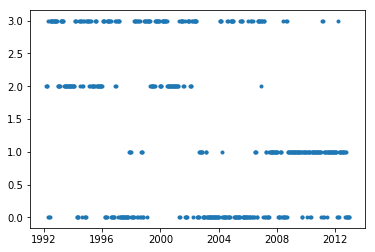

In [31]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(CorrMatrices)
ClusterPred = kmeans.fit_predict(CorrMatrices)
print(len(ClusterPred))
plt.scatter(NormRetDF.index[np.arange(Period+1, len(NormRetDF.index)-Shift, Shift)],
            ClusterPred, marker=".")
plt.show()


#### With DBSCAN instead of K-means

In [32]:
# determine mean distance as a guide for parameter epc in DBSCAN
from scipy.spatial import distance_matrix

distances = distance_matrix(CorrMatrices,CorrMatrices)
print(distances.shape)
print(np.mean(distances), np.std(distances))

(525, 525)
2.009911384221232 0.8223787045423553


In [33]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = np.mean(distances)-1*np.std(distances),
            min_samples=20)

In [34]:
db.fit(CorrMatrices)

DBSCAN(eps=1.1875326796788768, min_samples=20)

In [35]:
# Noisy samples are given the label -1
db.fit_predict(CorrMatrices)

array([-1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

## Alternativ: Erst aggregieren, dann normieren